In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import math
import pprint
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error

In [5]:
data = pd.read_csv('AAPL_sent_news.csv')

In [6]:
data['date']= data['publication_date']
#data['date']= pd.to_datetime(data.publication_date,format='%Y-%m-%d')
#data =data.set_index['date']
#data = date.drop(['publication_date'], axis=1)

In [7]:
data['date']= pd.to_datetime(data.publication_date,format='%Y-%m-%d')

In [8]:
data = data.set_index('date')

In [9]:
data = data.drop(['publication_date'], axis=1)

In [10]:
data[:100]

,compound,headline,neg,neu,pos,label
date,,,,,,
2016-05-24 00:17:38,-0.2960,Wall Street dips; Apple gain fails to offset r...,0.350,0.438,0.212,-1
2016-05-24 08:42:12,0.6318,More challenges than cheer for Apple chief on ...,0.000,0.608,0.392,1
2016-05-25 17:48:27,0.0000,India says Apple must sell locally-sourced goo...,0.000,1.000,0.000,0
2016-05-30 17:05:39,0.0000,India discussing Apple's request for FDI rules...,0.000,1.000,0.000,0
2016-06-01 08:29:12,0.0000,Apple plans to sell $1 bln of 30-yr bonds in T...,0.000,1.000,0.000,0
2016-06-02 20:16:42,0.4019,S&P 500 closes at seven-month high on data boost,0.000,0.748,0.252,1
2016-06-20 12:40:46,0.0000,India opens the door for Apple retail with new...,0.000,1.000,0.000,0
2016-06-22 03:12:40,-0.3818,Samsung takes fight to Apple with mobile walle...,0.245,0.755,0.000,-1
2016-06-23 10:22:07,0.0000,High-end smartphone market set to grow in Indi...,0.000,1.000,0.000,0


In [11]:
news_daily = data.resample('D').mean()

In [12]:
# Resample the full dataframe to monthly timeframe
#news_daily = data.resample('D').mean()



In [13]:
news_daily.fillna(0, inplace=True)
news_daily.head()

,compound,neg,neu,pos,label
date,,,,,
2016-05-24,0.1679,0.175,0.523,0.302,0.0
2016-05-25,0.0000,0.000,1.000,0.000,0.0
2016-05-26,0.0000,0.000,0.000,0.000,0.0
2016-05-27,0.0000,0.000,0.000,0.000,0.0
2016-05-28,0.0000,0.000,0.000,0.000,0.0


In [14]:
news_daily=news_daily.loc['2016-07-01':'2019-07-01']
news_daily.head()

,compound,neg,neu,pos,label
date,,,,,
2016-07-01,0.0,0.0,0.0,0.0,0.0
2016-07-02,0.0,0.0,0.0,0.0,0.0
2016-07-03,0.0,0.0,0.0,0.0,0.0
2016-07-04,0.0,0.0,0.0,0.0,0.0
2016-07-05,0.0,0.0,0.0,0.0,0.0


In [15]:
news_daily.describe()

,compound,neg,neu,pos,label
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,0.047188,0.061458,0.820976,0.091108,0.101900
std,0.082155,0.032604,0.142737,0.040458,0.184585
min,-0.476700,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.043086,0.818494,0.070792,0.000000
50%,0.045771,0.059887,0.845201,0.088604,0.100000
75%,0.089102,0.077225,0.868185,0.108849,0.200000
max,0.468850,0.280667,1.000000,0.316000,1.000000


### Fundamental Data

In [18]:
fund = pd.read_csv('AAPL_Fund.csv')
fund.head()

,date,marketcap,pricetobook,pricetoearnings,dividendyield,earningsyield,nopat,freecashflow,roe,ebitdagrowth,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
0,01/07/2019,9.270000e+11,9.6148,16.6516,0.018308,0.060054,55547452228,43960452228,0.491282,0.006515,...,79258000000,3.420000e+11,2.360000e+11,1.130000e+11,57170000000,71856000000,20138000000,-97236000000,1.450000e+11,1.3855
1,28/06/2019,9.300000e+11,8.7885,16.2734,0.018644,0.061450,55547452228,43960452228,0.491282,0.006515,...,79258000000,3.420000e+11,2.360000e+11,1.130000e+11,57170000000,71856000000,20138000000,-97236000000,1.450000e+11,1.3855
2,27/06/2019,9.390000e+11,8.8693,16.4231,0.018474,0.060890,55547452228,43960452228,0.491282,0.006515,...,79258000000,3.420000e+11,2.360000e+11,1.130000e+11,57170000000,71856000000,20138000000,-97236000000,1.450000e+11,1.3553
3,26/06/2019,9.390000e+11,8.8720,16.4280,0.018468,0.060872,55547452228,43960452228,0.491282,0.006515,...,79258000000,3.420000e+11,2.360000e+11,1.130000e+11,57170000000,71856000000,20138000000,-97236000000,1.450000e+11,1.3553
4,25/06/2019,9.190000e+11,8.6842,16.0802,0.018868,0.062188,55547452228,43960452228,0.491282,0.006515,...,79258000000,3.420000e+11,2.360000e+11,1.130000e+11,57170000000,71856000000,20138000000,-97236000000,1.450000e+11,1.3553


In [19]:
fund['date']= pd.to_datetime(fund.date,format='%d/%m/%Y')

In [20]:

fund.index =fund['date']

In [21]:
fund=fund.loc['2019-07-01':'2016-07-01']

In [22]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2019-07-01 to 2016-07-01
Data columns (total 35 columns):
date                              754 non-null datetime64[ns]
marketcap                         754 non-null float64
pricetobook                       754 non-null float64
pricetoearnings                   754 non-null float64
dividendyield                     754 non-null float64
earningsyield                     754 non-null float64
nopat                             754 non-null int64
freecashflow                      754 non-null int64
roe                               754 non-null float64
ebitdagrowth                      754 non-null float64
ebitdamargin                      754 non-null float64
cashdividendspershare             754 non-null float64
bookvaluepershare                 754 non-null float64
capex                             754 non-null int64
currentratio                      754 non-null float64
debttoequity                      754 non-null flo

### Price analysis

In [23]:
df_price = pd.read_csv('apple_price.csv')

In [24]:
df_price['date']= df_price['date']
df_price['date']=pd.to_datetime(df_price.date,format='%Y-%m-%d')
df_price.index =df_price['date']

In [25]:
#df_price = df_price.drop(['date'], axis=1)

In [26]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,intraperiod,low,open,volume
date,,,,,,,,,,,,,,
2019-08-06,0,197.00,198.067,194.0400,196.31,35824787.0,197.00,2019-08-06,daily,198.067,False,194.0400,196.31,35824787.0
2019-08-05,1,193.34,198.649,192.5800,197.99,52392969.0,193.34,2019-08-05,daily,198.649,False,192.5800,197.99,52392969.0
2019-08-02,2,204.02,206.430,201.6300,205.53,40862122.0,204.02,2019-08-02,daily,206.430,False,201.6300,205.53,40862122.0
2019-08-01,3,208.43,218.030,206.7435,213.90,54017922.0,208.43,2019-08-01,daily,218.030,False,206.7435,213.90,54017922.0
2019-07-31,4,213.04,221.370,211.3000,216.42,69281361.0,213.04,2019-07-31,daily,221.370,False,211.3000,216.42,69281361.0


In [27]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1200 entries, 2019-08-06 to 2014-10-29
Data columns (total 14 columns):
Unnamed: 0     1200 non-null int64
adj_close      1200 non-null float64
adj_high       1200 non-null float64
adj_low        1200 non-null float64
adj_open       1200 non-null float64
adj_volume     1200 non-null float64
close          1200 non-null float64
date           1200 non-null datetime64[ns]
frequency      1200 non-null object
high           1200 non-null float64
intraperiod    1200 non-null bool
low            1200 non-null float64
open           1200 non-null float64
volume         1200 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(1), object(1)
memory usage: 132.4+ KB


In [29]:
import talib
for n in [14, 30, 50, 200]:

    # Create the moving average indicator and divide by Adj_Close
    df_price['ma' + str(n)] = talib.SMA(df_price['adj_close'].values,
                              timeperiod=n) / df_price['adj_close']
    # Create the RSI indicator
    df_price['rsi' + str(n)] = talib.RSI(df_price['adj_close'].values, timeperiod=n)

In [30]:
df_price=df_price.loc['2019-07-01':'2016-07-01']

In [31]:
df_price.ma200

date
2019-07-01         NaN
2019-06-28         NaN
2019-06-27         NaN
2019-06-26         NaN
2019-06-25         NaN
2019-06-24         NaN
2019-06-21         NaN
2019-06-20         NaN
2019-06-19         NaN
2019-06-18         NaN
2019-06-17         NaN
2019-06-14         NaN
2019-06-13         NaN
2019-06-12         NaN
2019-06-11         NaN
2019-06-10         NaN
2019-06-07         NaN
2019-06-06         NaN
2019-06-05         NaN
2019-06-04         NaN
2019-06-03         NaN
2019-05-31         NaN
2019-05-30         NaN
2019-05-29         NaN
2019-05-28         NaN
2019-05-24         NaN
2019-05-23         NaN
2019-05-22         NaN
2019-05-21         NaN
2019-05-20         NaN
                ...   
2016-08-12    1.165378
2016-08-11    1.165862
2016-08-10    1.162897
2016-08-09    1.152073
2016-08-08    1.154579
2016-08-05    1.161887
2016-08-04    1.177185
2016-08-03    1.182084
2016-08-02    1.194466
2016-08-01    1.174563
2016-07-29    1.192699
2016-07-28    1.188609
2016-0

In [32]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2019-07-01 to 2016-07-01
Data columns (total 22 columns):
Unnamed: 0     754 non-null int64
adj_close      754 non-null float64
adj_high       754 non-null float64
adj_low        754 non-null float64
adj_open       754 non-null float64
adj_volume     754 non-null float64
close          754 non-null float64
date           754 non-null datetime64[ns]
frequency      754 non-null object
high           754 non-null float64
intraperiod    754 non-null bool
low            754 non-null float64
open           754 non-null float64
volume         754 non-null float64
ma14           754 non-null float64
rsi14          754 non-null float64
ma30           750 non-null float64
rsi30          749 non-null float64
ma50           730 non-null float64
rsi50          729 non-null float64
ma200          580 non-null float64
rsi200         579 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(18), int64(1), object(1)
memory usage: 

In [33]:
#df.join(other, lsuffix='_caller', rsuffix='_other')
df_price = df_price.join(news_daily['compound'])
#full_df = pd.merge(df_price,news_daily['compound'],how='left')

In [34]:
df_price=pd.merge(df_price,fund,how='outer',on='date')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [35]:
df_price.index =df_price['date']

In [36]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
date,,,,,,,,,,,,,,,,,,,,,
2019-07-01,25,201.55,204.490,200.65,203.17,27316739.0,201.55,2019-07-01,daily,204.490,...,79258000000,3.420000e+11,2.360000e+11,1.130000e+11,57170000000,71856000000,20138000000,-97236000000,1.450000e+11,1.3855
2019-06-28,26,197.92,199.495,197.05,198.68,31110642.0,197.92,2019-06-28,daily,199.495,...,79258000000,3.420000e+11,2.360000e+11,1.130000e+11,57170000000,71856000000,20138000000,-97236000000,1.450000e+11,1.3855
2019-06-27,27,199.74,201.570,199.57,200.29,20899717.0,199.74,2019-06-27,daily,201.570,...,79258000000,3.420000e+11,2.360000e+11,1.130000e+11,57170000000,71856000000,20138000000,-97236000000,1.450000e+11,1.3553
2019-06-26,28,199.80,200.990,197.35,197.77,26067512.0,199.80,2019-06-26,daily,200.990,...,79258000000,3.420000e+11,2.360000e+11,1.130000e+11,57170000000,71856000000,20138000000,-97236000000,1.450000e+11,1.3553
2019-06-25,29,195.57,199.260,195.29,198.43,21070334.0,195.57,2019-06-25,daily,199.260,...,79258000000,3.420000e+11,2.360000e+11,1.130000e+11,57170000000,71856000000,20138000000,-97236000000,1.450000e+11,1.3553


In [37]:
df_price['Unnamed: 0'].drop

<bound method Series.drop of date
2019-07-01     25
2019-06-28     26
2019-06-27     27
2019-06-26     28
2019-06-25     29
2019-06-24     30
2019-06-21     31
2019-06-20     32
2019-06-19     33
2019-06-18     34
2019-06-17     35
2019-06-14     36
2019-06-13     37
2019-06-12     38
2019-06-11     39
2019-06-10     40
2019-06-07     41
2019-06-06     42
2019-06-05     43
2019-06-04     44
2019-06-03     45
2019-05-31     46
2019-05-30     47
2019-05-29     48
2019-05-28     49
2019-05-24     50
2019-05-23     51
2019-05-22     52
2019-05-21     53
2019-05-20     54
             ... 
2016-08-12    749
2016-08-11    750
2016-08-10    751
2016-08-09    752
2016-08-08    753
2016-08-05    754
2016-08-04    755
2016-08-03    756
2016-08-02    757
2016-08-01    758
2016-07-29    759
2016-07-28    760
2016-07-27    761
2016-07-26    762
2016-07-25    763
2016-07-22    764
2016-07-21    765
2016-07-20    766
2016-07-19    767
2016-07-18    768
2016-07-15    769
2016-07-14    770
2016-07-13  

In [38]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2019-07-01 to 2016-07-01
Data columns (total 57 columns):
Unnamed: 0                        754 non-null int64
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              754 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null bool
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              754 non-null float64
rsi14                             754 non-null flo

In [39]:
df_price['ebitda'] = df_price['ebitda'].astype(float)

In [40]:
df_price.columns

Index(['Unnamed: 0', 'adj_close', 'adj_high', 'adj_low', 'adj_open',
       'adj_volume', 'close', 'date', 'frequency', 'high', 'intraperiod',
       'low', 'open', 'volume', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50',
       'rsi50', 'ma200', 'rsi200', 'compound', 'marketcap', 'pricetobook',
       'pricetoearnings', 'dividendyield', 'earningsyield', 'nopat',
       'freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin',
       'cashdividendspershare', 'bookvaluepershare', 'capex', 'currentratio',
       'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
       'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta'],
      dtype='object')

In [41]:
fundamentals=['marketcap', 'pricetobook','pricetoearnings', 'dividendyield', 'earningsyield', 'nopat','freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin',
       'cashdividendspershare', 'bookvaluepershare', 'capex', 'currentratio',
       'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
       'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments','one_yr_monthly_beta']

In [42]:
for column in fundamentals:
    df_price[column] = df_price[column].astype(float)

In [43]:
df_price=df_price[::-1]

In [44]:
df_price.head()

,Unnamed: 0,adj_close,adj_high,adj_low,adj_open,adj_volume,close,date,frequency,high,...,ebitda,totalassets,totalliabilities,debt,netincome,netcashfromoperatingactivities,netcashfrominvestingactivities,netcashfromfinancingactivities,longterminvestments,one_yr_monthly_beta
date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,778,91.258871,91.806101,90.725917,90.878190,26026540.0,95.89,2016-07-01,daily,96.465,...,7.532200e+10,3.060000e+11,1.790000e+11,8.493500e+10,4.779700e+10,6.317300e+10,-3.995500e+10,-2.030000e+10,1.700000e+11,1.5961
2016-07-05,777,90.402338,90.792537,89.897935,90.783020,27705210.0,94.99,2016-07-05,daily,95.400,...,7.532200e+10,3.060000e+11,1.790000e+11,8.493500e+10,4.779700e+10,6.317300e+10,-3.995500e+10,-2.030000e+10,1.700000e+11,1.5961
2016-07-06,776,90.916258,91.039980,89.812282,90.031174,30949090.0,95.53,2016-07-06,daily,95.660,...,7.532200e+10,3.060000e+11,1.790000e+11,8.493500e+10,4.779700e+10,6.317300e+10,-3.995500e+10,-2.030000e+10,1.700000e+11,1.5961
2016-07-07,775,91.306457,91.839411,91.001911,91.078048,25139558.0,95.94,2016-07-07,daily,96.500,...,7.532200e+10,3.060000e+11,1.790000e+11,8.493500e+10,4.779700e+10,6.317300e+10,-3.995500e+10,-2.030000e+10,1.700000e+11,1.5961
2016-07-08,774,92.010717,92.210575,91.411144,91.829894,28912103.0,96.68,2016-07-08,daily,96.890,...,7.532200e+10,3.060000e+11,1.790000e+11,8.493500e+10,4.779700e+10,6.317300e+10,-3.995500e+10,-2.030000e+10,1.700000e+11,1.5961


### EDA

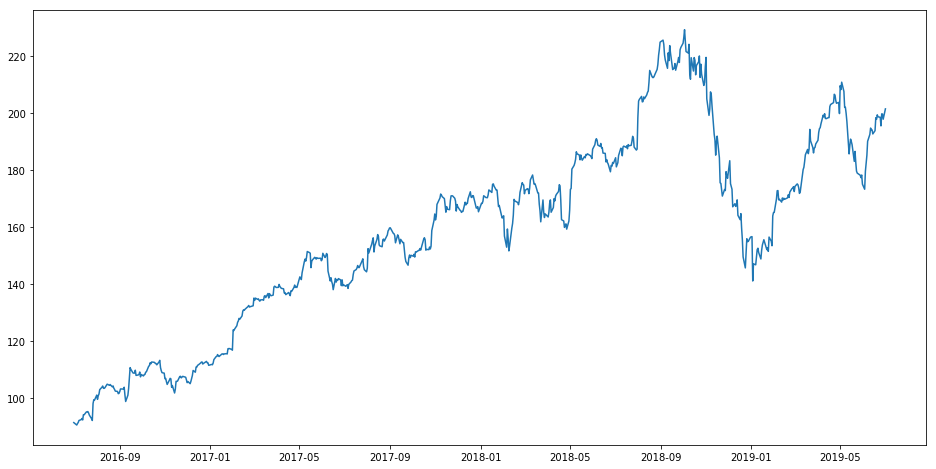

In [45]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df_price['adj_close'], label='Close Price history')

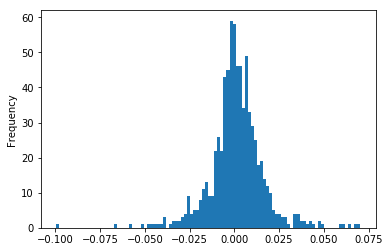

In [46]:
df_price['adj_close'].pct_change().plot.hist(bins=100)

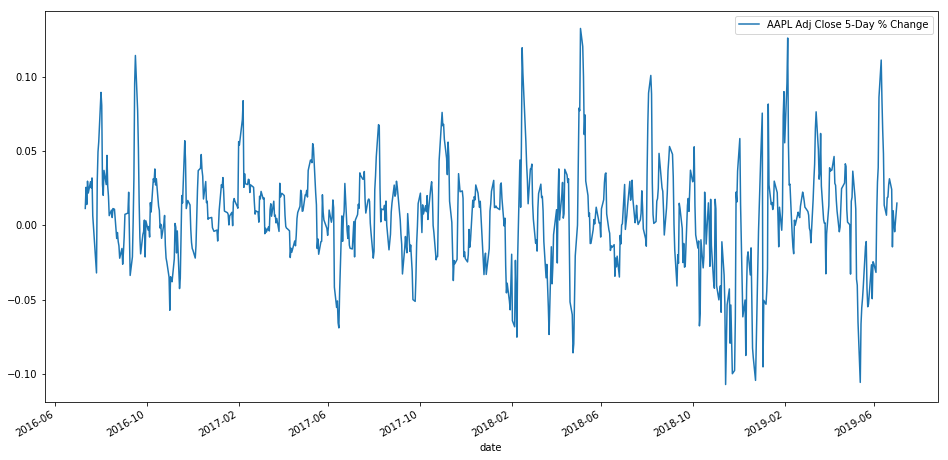

In [48]:
plt.figure(figsize=(16,8))
df_price['adj_close'].pct_change(5).plot(label='AAPL Adj Close 5-Day % Change',legend=True)

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000             0.058929
5d_close_future_pct      0.058929             1.000000


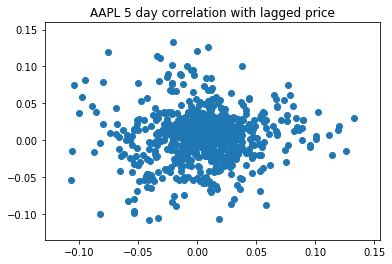

In [49]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_price['5d_future_close'] = df_price['adj_close'].shift(-5)
df_price['5d_close_future_pct'] = df_price['5d_future_close'].pct_change(5)
df_price['5d_close_pct'] = df_price['adj_close'].pct_change(5)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_price[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('AAPL 5 day correlation with lagged price')
plt.scatter(df_price['5d_close_pct'], df_price['5d_close_future_pct'])
plt.show()

                     compound  5d_close_future_pct
compound              1.00000              0.00645
5d_close_future_pct   0.00645              1.00000


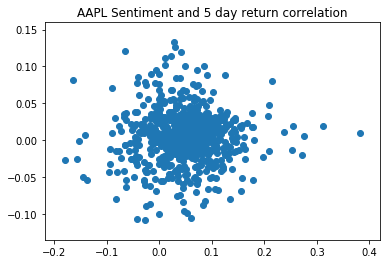

In [50]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_price[['compound', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('AAPL Sentiment and 5 day return correlation')
plt.scatter(df_price['compound'], df_price['5d_close_future_pct'])
plt.show()

                     1d_close_pct  1d_close_future_pct
1d_close_pct             1.000000             0.014947
1d_close_future_pct      0.014947             1.000000


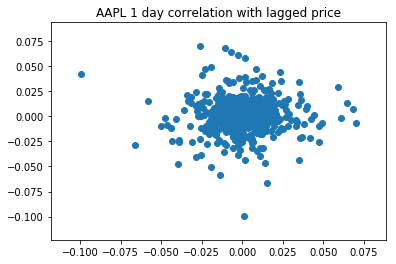

In [51]:
df_1 = df_price
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_1['1d_future_close'] = df_1['adj_close'].shift(-1)
df_1['1d_close_future_pct'] = df_1['1d_future_close'].pct_change(1)
df_1['1d_close_pct'] = df_1['adj_close'].pct_change(1)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_1[['1d_close_pct', '1d_close_future_pct']].corr()
print(corr)
# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('AAPL 1 day correlation with lagged price')
plt.scatter(df_1['1d_close_pct'], df_1['1d_close_future_pct'])
plt.show()

                     compound  1d_close_future_pct
compound             1.000000             0.017024
1d_close_future_pct  0.017024             1.000000


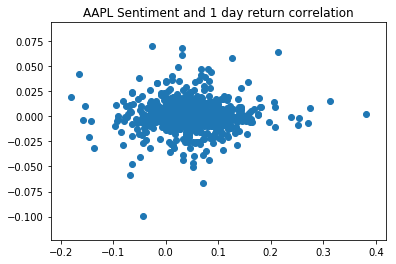

In [52]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_1[['compound', '1d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('AAPL Sentiment and 1 day return correlation')
plt.scatter(df_1['compound'], df_1['1d_close_future_pct'])
plt.show()

                      30d_close_pct  30d_close_future_pct
30d_close_pct              1.000000             -0.061982
30d_close_future_pct      -0.061982              1.000000


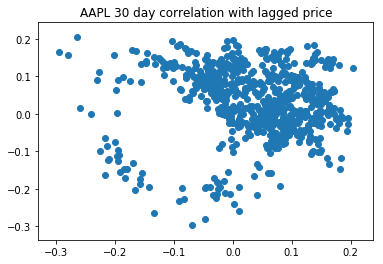

In [53]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
df_30 = df_price
df_30['30d_future_close'] = df_price['adj_close'].shift(-30)
df_30['30d_close_future_pct'] = df_price['30d_future_close'].pct_change(30)
df_30['30d_close_pct'] = df_price['adj_close'].pct_change(30)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_30[['30d_close_pct', '30d_close_future_pct']].corr()
print(corr)
# Scatter the current 30-day percent change vs the future 5-day percent change
plt.title('AAPL 30 day correlation with lagged price')
plt.scatter(df_30['30d_close_pct'], df_30['30d_close_future_pct'])
plt.show()

                      compound  30d_close_future_pct
compound               1.00000              -0.11211
30d_close_future_pct  -0.11211               1.00000


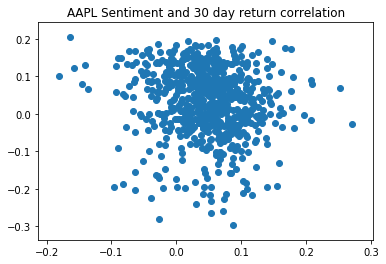

In [54]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = df_30[['compound', '30d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.title('AAPL Sentiment and 30 day return correlation')
plt.scatter(df_30['compound'], df_30['30d_close_future_pct'])
plt.show()

In [55]:
df_price = df_price.drop(['Unnamed: 0'], axis =1)

In [56]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2016-07-01 to 2019-07-01
Data columns (total 65 columns):
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              754 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null bool
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              754 non-null float64
rsi14                             754 non-null float64
ma30                              750 non-null f

In [57]:
#df_price['MACD'] = pd.Series(talib.MACD(df_price['adj_close'], fastperiod=12, slowperiod=26, signalperiod=9))
#df_price['STOCH'] = pd.Series(talib.STOCH(df_price['adj_high'].values,df_price['adj_low'].values,df_price['adj_close'].values,fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0))

In [58]:
#df_price[:50]

#df_price.drop(['MACD','STOCH'], axis =1)

In [59]:
feature_names = ['5d_close_pct']  # a list of the feature names for later

# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14, 30, 50, 200]:

    # Create the moving average indicator and divide by Adj_Close
    df_price['ma' + str(n)] = talib.SMA(df_price['adj_close'].values,
                              timeperiod=n) / df_price['adj_close']
    # Create the RSI indicator
    df_price['rsi' + str(n)] = talib.RSI(df_price['adj_close'].values, timeperiod=n)
    
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

    

        

feature_names = feature_names + ['compound'] + fundamentals
print(feature_names)



['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200', 'compound', 'marketcap', 'pricetobook', 'pricetoearnings', 'dividendyield', 'earningsyield', 'nopat', 'freecashflow', 'roe', 'ebitdagrowth', 'ebitdamargin', 'cashdividendspershare', 'bookvaluepershare', 'capex', 'currentratio', 'debttoequity', 'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth', 'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps', 'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt', 'netincome', 'netcashfromoperatingactivities', 'netcashfrominvestingactivities', 'netcashfromfinancingactivities', 'longterminvestments', 'one_yr_monthly_beta']


In [60]:
# Create 2 new volume features, 1-day % change and 5-day SMA of the % change
new_features = ['Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']
feature_names.extend(new_features)
df_price['Adj_Volume_1d_change'] = df_price['adj_volume'].pct_change()
df_price['Adj_Volume_1d_change_SMA'] = talib.SMA(df_price['Adj_Volume_1d_change'].values,
                                               timeperiod=5)


/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


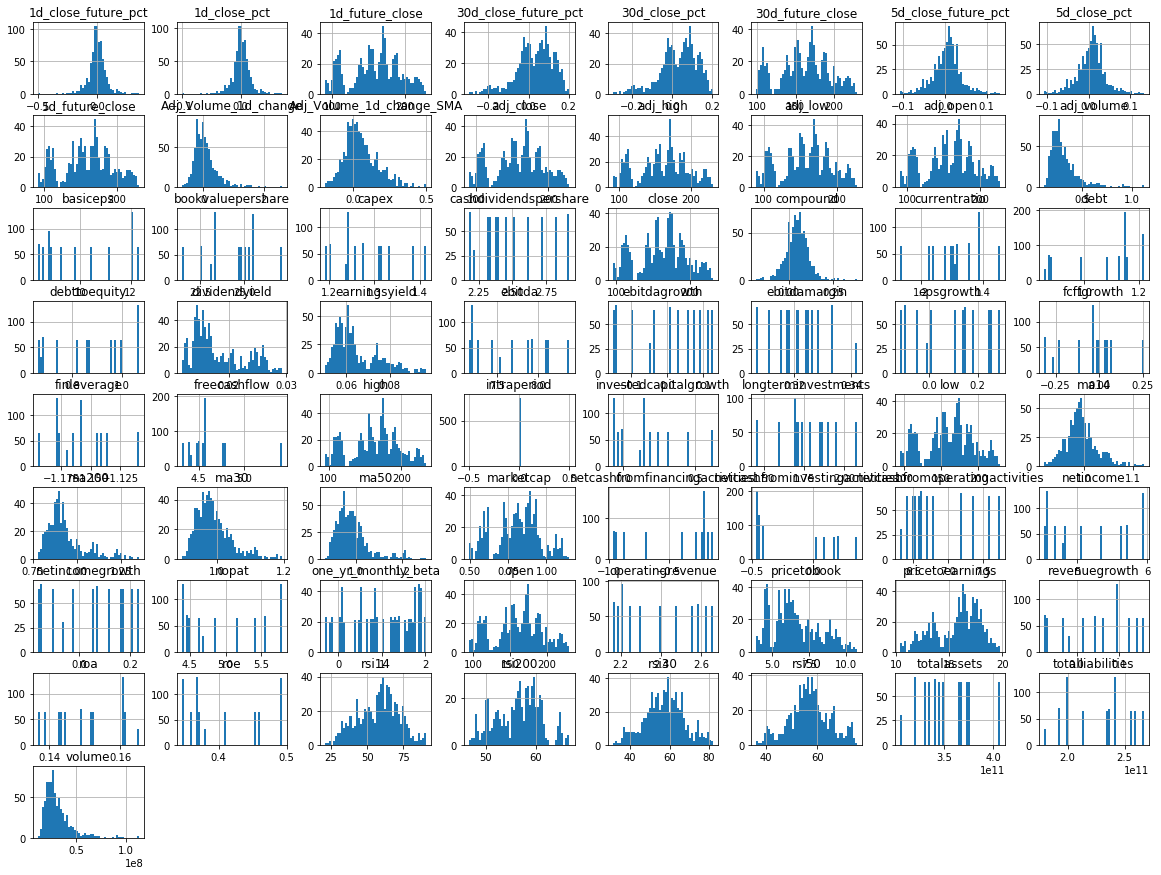

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
df_price.hist(bins=50, figsize=(20,15))
plt.show()

In [62]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2016-07-01 to 2019-07-01
Data columns (total 67 columns):
adj_close                         754 non-null float64
adj_high                          754 non-null float64
adj_low                           754 non-null float64
adj_open                          754 non-null float64
adj_volume                        754 non-null float64
close                             754 non-null float64
date                              754 non-null datetime64[ns]
frequency                         754 non-null object
high                              754 non-null float64
intraperiod                       754 non-null bool
low                               754 non-null float64
open                              754 non-null float64
volume                            754 non-null float64
ma14                              741 non-null float64
rsi14                             740 non-null float64
ma30                              725 non-null f

In [63]:
df_price.columns

Index(['adj_close', 'adj_high', 'adj_low', 'adj_open', 'adj_volume', 'close',
       'date', 'frequency', 'high', 'intraperiod', 'low', 'open', 'volume',
       'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200',
       'compound', 'marketcap', 'pricetobook', 'pricetoearnings',
       'dividendyield', 'earningsyield', 'nopat', 'freecashflow', 'roe',
       'ebitdagrowth', 'ebitdamargin', 'cashdividendspershare',
       'bookvaluepershare', 'capex', 'currentratio', 'debttoequity',
       'epsgrowth', 'investedcapitalgrowth', 'fcffgrowth', 'finleverage',
       'netincomegrowth', 'roa', 'revenuegrowth', 'basiceps',
       'operatingrevenue', 'ebitda', 'totalassets', 'totalliabilities', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta', '5d_future_close',
       '5d_close_future_pct', '5d_close_pct', '1d_future_close',
       '1d_clos

In [64]:
# Drop all na values
df_price = df_price.dropna()

# Create features and targets
# use feature_names for features; 5d_close_future_pct for targets
features = df_price[feature_names]
targets = df_price['5d_close_future_pct']

# Create DataFrame from target column and feature columns
feat_targ_df = df_price[['5d_close_future_pct'] + feature_names]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

                                5d_close_future_pct  5d_close_pct      ma14  \
5d_close_future_pct                        1.000000      0.060289 -0.066883   
5d_close_pct                               0.060289      1.000000 -0.861717   
ma14                                      -0.066883     -0.861717  1.000000   
rsi14                                      0.053866      0.687386 -0.857649   
ma30                                      -0.102886     -0.671016  0.879335   
rsi30                                      0.004792      0.522532 -0.700513   
ma50                                      -0.070961     -0.522495  0.725342   
rsi50                                     -0.026476      0.406871 -0.563668   
ma200                                      0.088820     -0.228986  0.338196   
rsi200                                    -0.025321      0.197939 -0.285092   
compound                                   0.000549      0.254201 -0.301177   
marketcap                                 -0.222578 

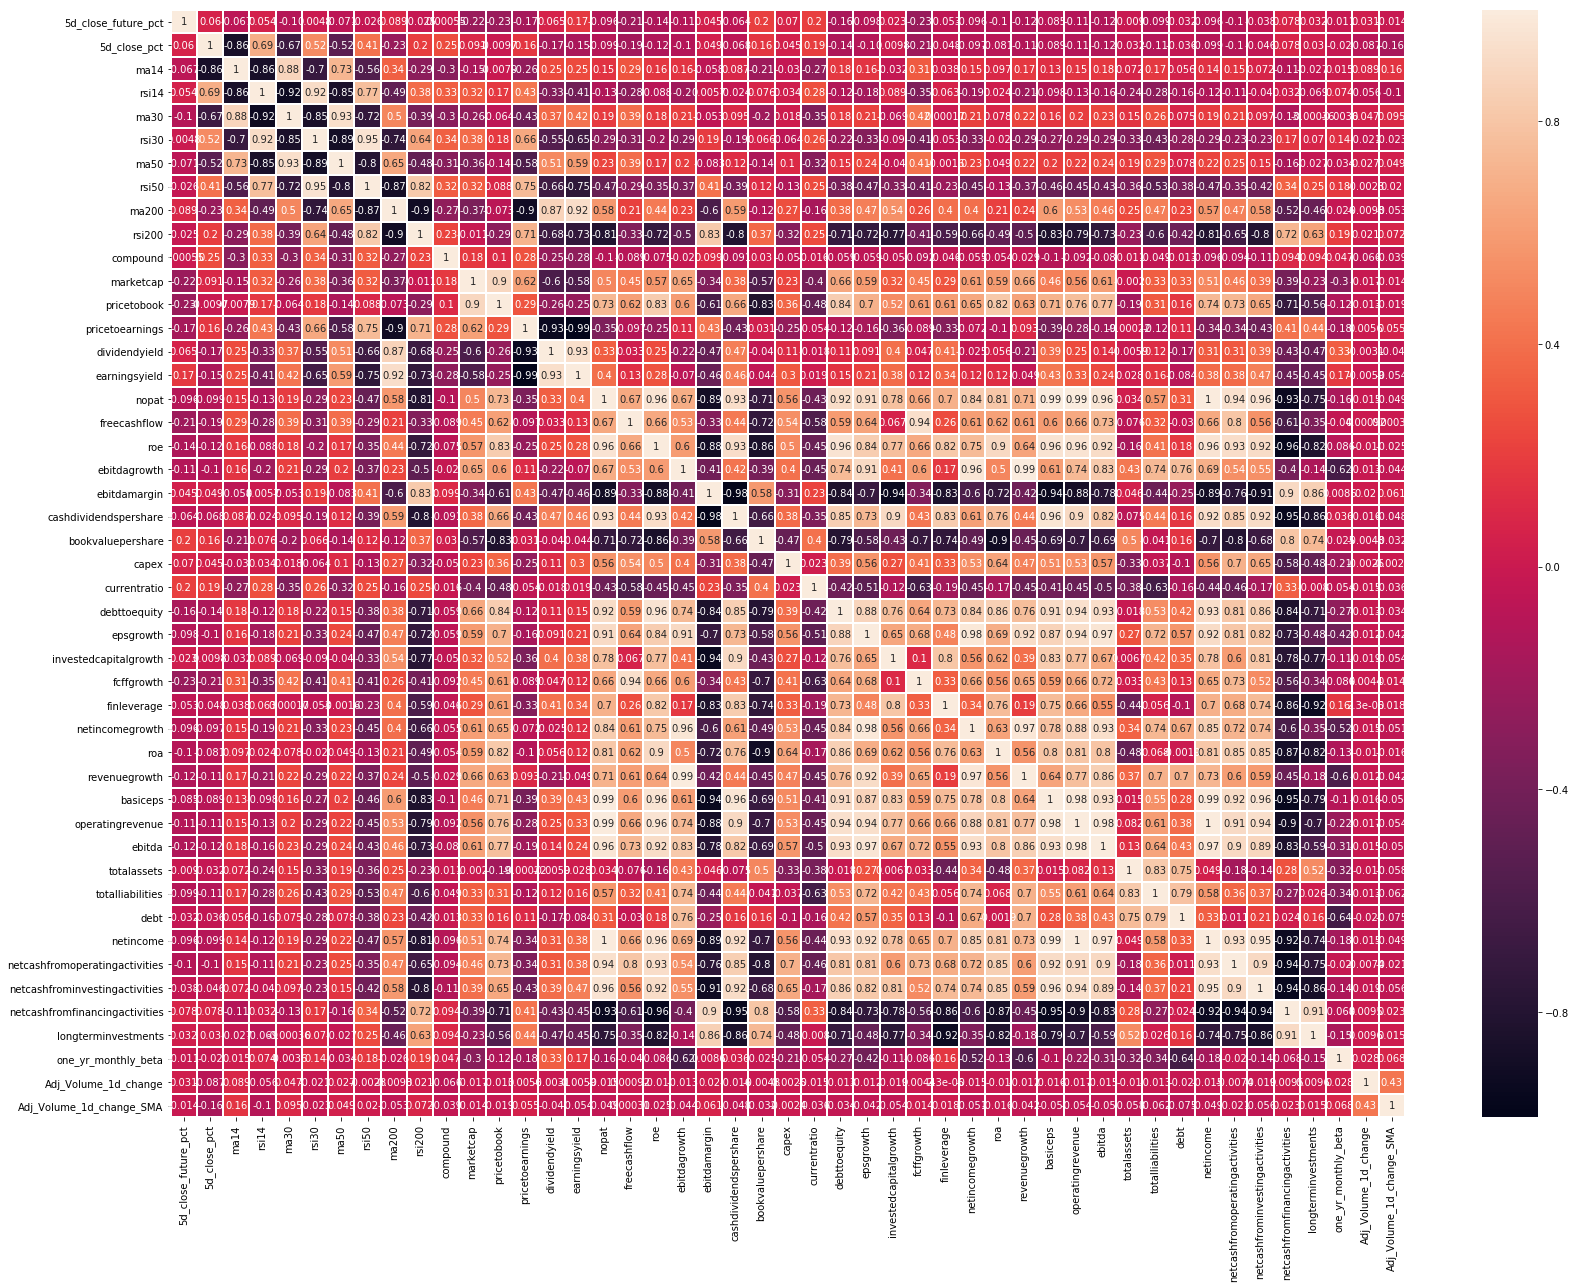

<Figure size 432x288 with 0 Axes>

In [65]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(24, 18))
sns.heatmap(corr, annot=True,linewidths=1)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()  # clear the plot area

# Create a scatter plot of the most highly correlated variable with the target
#plt.scatter(df_price['ma200'], df_price['5d_close_future_pct'])
#plt.show()

In [66]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = df_price.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.90)]

# Drop the features in the to_drop list
reduced_df = df_price.drop(to_drop, axis=1)

print("The reduced_df dataframe has {} columns".format(reduced_df.shape[1]))

The reduced_df dataframe has 31 columns


In [67]:
reduced_df.columns

Index(['date', 'frequency', 'intraperiod', 'volume', 'ma14', 'rsi50', 'rsi200',
       'compound', 'earningsyield', 'bookvaluepershare', 'capex',
       'currentratio', 'investedcapitalgrowth', 'fcffgrowth', 'roa',
       'revenuegrowth', 'totalassets', 'totalliabilities', 'debt',
       'longterminvestments', 'one_yr_monthly_beta', '5d_close_future_pct',
       '5d_close_pct', '1d_future_close', '1d_close_future_pct',
       '1d_close_pct', '30d_future_close', '30d_close_future_pct',
       '30d_close_pct', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA'],
      dtype='object')

In [68]:
feature_names=['volume', 'ma14', 'rsi50', 'ma200',
       'rsi200', 'compound',
       'pricetobook', 'dividendyield', 'freecashflow', 'capex',
       'currentratio', 'debttoequity', 'investedcapitalgrowth', 'fcffgrowth',
       'finleverage', 'netincomegrowth', 'roa', 'revenuegrowth',
       'operatingrevenue', 'netincome', 'netcashfromoperatingactivities',
       'netcashfromfinancingactivities', 'longterminvestments',
       'one_yr_monthly_beta',
       '5d_close_pct', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']

In [69]:
feature_names = ['compound',
       'marketcap', 'pricetobook', 'dividendyield', 'earningsyield',
       'ebitdamargin', 'cashdividendspershare', 'bookvaluepershare',
       'currentratio', 'debttoequity', 'fcffgrowth', 'finleverage',
       'revenuegrowth', 'operatingrevenue', 'ebitda', 'totalassets', 'debt',
       'netincome', 'netcashfromoperatingactivities',
       'netcashfrominvestingactivities', 'netcashfromfinancingactivities',
       'longterminvestments', 'one_yr_monthly_beta', '5d_close_pct', 'ma14', 'ma30', 'ma50', 'rsi50',
       'ma200', 'rsi200', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']

In [70]:
#feature_names = ['5d_close_pct', 'ma14','ma50', 'rsi50', 'ma200', 'rsi200', 'compound', 'pricetobook', 'pricetoearnings', 'dividendyield', 'earningsyield']
#feature_names = ['compound']
features = df_price[feature_names]
targets = reduced_df['5d_close_future_pct']





In [71]:
targets.describe()

count    524.000000
mean       0.003330
std        0.036480
min       -0.107160
25%       -0.016531
50%        0.007271
75%        0.022436
max        0.132516
Name: 5d_close_future_pct, dtype: float64

In [72]:
# Import the statsmodels library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.80 * features.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:len(targets)]
test_targets = targets[train_size:len(targets)]
print(linear_features.shape, train_features.shape, test_features.shape)
print(linear_features.shape, train_features.shape, test_features.shape)

(524, 33) (419, 33) (105, 33)
(524, 33) (419, 33) (105, 33)


In [73]:
train_size

419

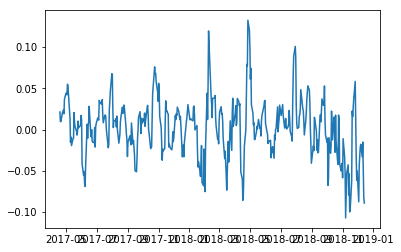

In [74]:
plt.plot(train_targets)

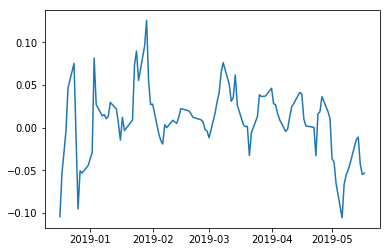

In [75]:
plt.plot(test_targets)

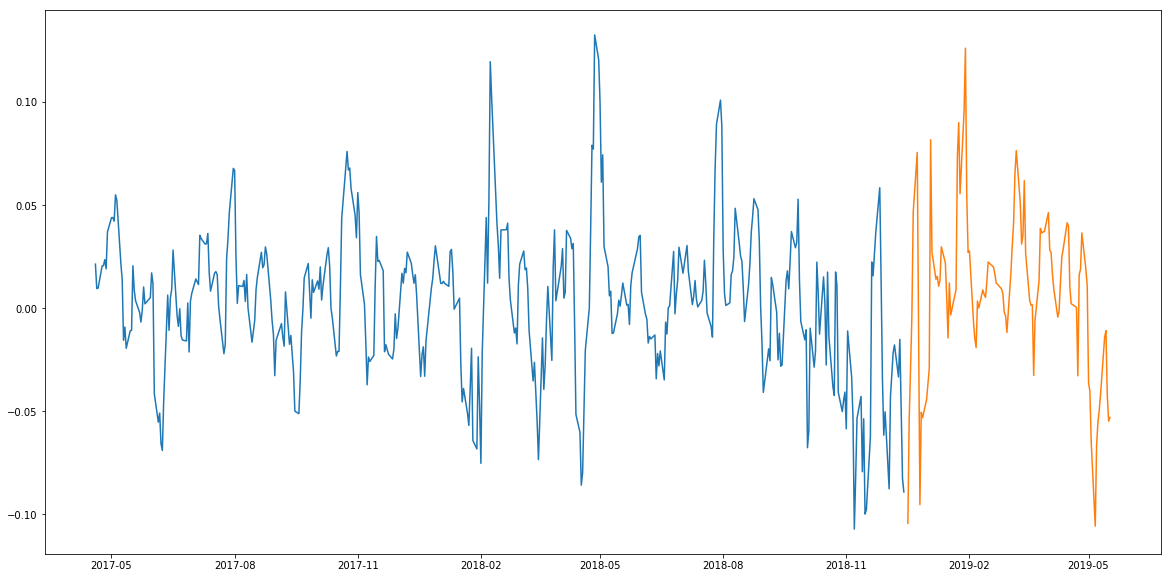

In [76]:
plt.figure(figsize=(20,10))
plt.plot(train_targets)
plt.plot(test_targets)
plt.show()

In [77]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model
print(results.summary())

# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

                             OLS Regression Results                            
Dep. Variable:     5d_close_future_pct   R-squared:                       0.213
Model:                             OLS   Adj. R-squared:                  0.179
Method:                  Least Squares   F-statistic:                     6.371
Date:                 Mon, 26 Aug 2019   Prob (F-statistic):           2.44e-13
Time:                         16:30:27   Log-Likelihood:                 856.94
No. Observations:                  419   AIC:                            -1678.
Df Residuals:                      401   BIC:                            -1605.
Df Model:                           17                                         
Covariance Type:             nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
co

KeyboardInterrupt: 

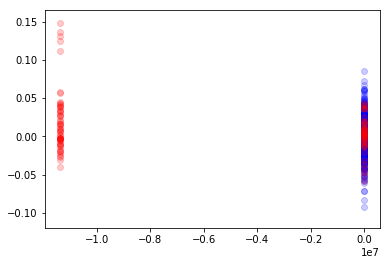

In [454]:
# Scatter the predictions vs the targets with 80% transparency
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha= 0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()

In [78]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
# scikit-learn:
lr = LinearRegression()
lr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(train_features)
test_predictions = lr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
#plt.scatter(train_targets, train_predictions, label='train')
#plt.scatter(test_targets, test_predictions, label='test')
#plt.legend()
#plt.show()

In [79]:
# Look at the R^2 scores on train and test
print(lr.score(train_features, train_targets))
print(lr.score(test_features, test_targets))

0.325180461013137
-1.3935148977554202e+18


In [80]:
print(mean_squared_error(train_targets, train_predictions))
print(mean_squared_error(test_targets, test_predictions))


0.0008396592346388071
2287116347228599.5


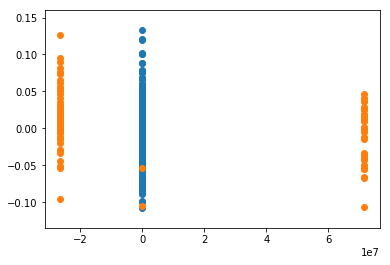

In [81]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

In [82]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [83]:
scaler = StandardScaler()


scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.fit_transform(test_features)

print(linear_features.shape, scaled_train_features.shape, scaled_test_features.shape)
print(linear_features.shape, scaled_train_features.shape, scaled_test_features.shape)

(524, 33) (419, 33) (105, 33)
(524, 33) (419, 33) (105, 33)


In [84]:
# scikit-learn:
lr = LinearRegression()
lr.fit(scaled_train_features, train_targets)

# Make predictions with our model
train_predictions = lr.predict(scaled_train_features)
test_predictions = lr.predict(scaled_test_features)

# Create a scatter plot with train and test actual vs predictions
#plt.scatter(train_targets, train_predictions, label='train')
#plt.scatter(test_targets, test_predictions, label='test')
#plt.legend()
#plt.show()b

In [85]:
# Look at the R^2 scores on train and test
print(lr.score(scaled_train_features, train_targets))
print(lr.score(scaled_test_features, test_targets))

0.3244348434383729
-9.498133386626021e+26


In [86]:
print(mean_squared_error(train_targets, train_predictions))
print(mean_squared_error(test_targets, test_predictions))
rsme_train = np.sqrt(mean_squared_error(train_targets, train_predictions))
rsme_test = np.sqrt(mean_squared_error(test_targets, test_predictions))
print('Train Root mean squared error: ' + str(rsme_train))
print('Test Root mean squared error: ' + str(rsme_test))

0.0008405869859056119
1.5588879725434293e+24
Train Root mean squared error: 0.028992878192853015
Test Root mean squared error: 1248554353059.3408


In [124]:
column =['Prediction']
test= pd.DataFrame(test_predictions,columns=column,index=test_targets.index)
#test

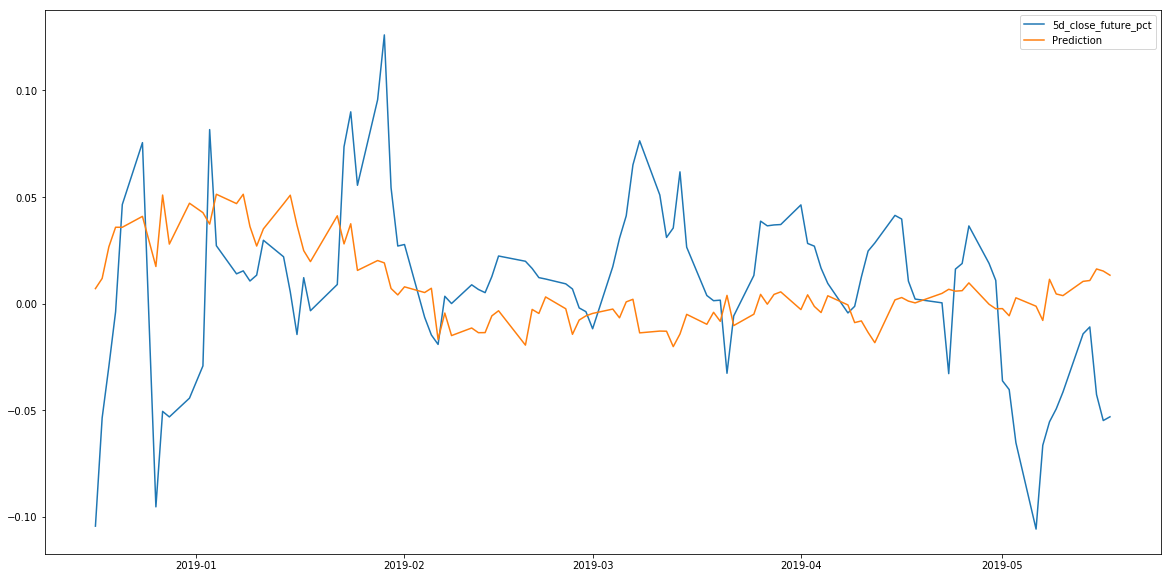

In [125]:
plt.figure(figsize=(20,10))
plt.plot(test_targets)
plt.plot(test)
plt.legend(['5d_close_future_pct','Prediction'])
plt.show()

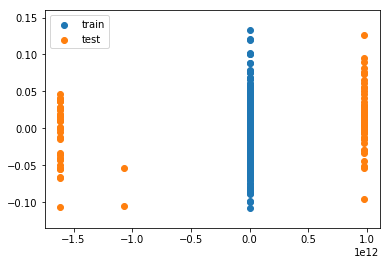

In [89]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

### Lasso And Ridge - https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
scaler = StandardScaler()
# Fit the scaler on the training features and transform these in one go
scaled_train_features = scaler.fit_transform(train_features)

# Create the Lasso model 
la = Lasso()

# Fit it to the standardized training data
la.fit(scaled_train_features, train_targets)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [91]:
# Transform the test set with the pre-fitted scaler
scaled_test_features = scaler.transform(test_features)

# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = la.score(scaled_test_features, test_targets)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# Create a list that has True values when coefficients equal 0
zero_coef = la.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(la.coef_)))

The model can predict -1.7% of the variance in the test set.
The model has ignored 33 out of 33 features.


In [126]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.01,normalize=True)

lassoReg.fit(train_features, train_targets)

pred = lassoReg.predict(test_features)
train_pred= lassoReg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
mse = mean_squared_error(test_targets, pred)

print(train_score)
print(score)
print(mse)
print(np.sqrt(mse))

0.0
-0.016880954943106374
0.0016689631800721532
0.0408529457943017


In [138]:
from sklearn.linear_model import Ridge

alphas = np.array([20,10,5,4,3,2,1.5,1,0.5,0.1,0.01,0.001,0.0001,0])
test_scores=[]
train_scores=[]

for n in alphas:
    ridgeReg = Ridge(alpha=n, normalize=True)
    ridgeReg.fit(train_features, train_targets)
    pred = ridgeReg.predict(test_features)
    train_pred= ridgeReg.predict(train_features)
    train_score = r2_score(train_targets, train_pred)
    train_scores.append(train_score)
    score = r2_score(test_targets, pred)
    test_scores.append(score)


ridge=pd.DataFrame(data=test_scores, index=alphas)

print(ridge)

                    0
20.0000 -2.728429e-02
10.0000 -2.626036e-02
5.0000  -1.427720e-02
4.0000  -7.410785e-03
3.0000   3.471071e-03
2.0000   2.192083e-02
1.5000   3.652839e-02
1.0000   5.840985e-02
0.5000   9.899749e-02
0.1000   1.959078e-01
0.0100  -7.127459e-01
0.0010  -7.877351e-01
0.0001  -4.189782e-01
0.0000  -5.789723e+19


In [141]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=0.1, normalize=True)

ridgeReg.fit(train_features, train_targets)

pred = ridgeReg.predict(test_features)
train_pred= ridgeReg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
mse = mean_squared_error(test_targets, pred)

print('Train r2: ' + str(train_score))
print('Test r2: ' + str(score))
#print(mse)
#print(np.sqrt(mse))

Train r2: 0.22484187295895308
Test r2: 0.19590782604862889


In [129]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=10, l1_ratio=1, normalize=False)

ENreg.fit(train_features,train_targets)

pred_cv = ENreg.predict(test_features)
train_pred= ENreg.predict(train_features)

train_score = r2_score(train_targets, train_pred)
score = r2_score(test_targets, pred)
mse = mean_squared_error(test_targets, pred)

print('Train r2: ' + str(train_score))
print('Test r2: ' + str(score))
#print(mse)
#print(np.sqrt(mse))

Train r2: 0.12027486440030122
Test r2: 0.0989974927308025


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### PLS - https://www.idtools.com.au/partial-least-squares-regression-python/

In [142]:
#S basic codePython
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define PLS object
pls = PLSRegression(n_components=1)

# Fit
pls.fit(scaled_train_features, train_targets)

# Prediction
train_predicitions = pls.predict(scaled_train_features)
test_predicitions = pls.predict(scaled_test_features)

# Calculate scores
train_score = r2_score(train_targets,train_predictions)
score = r2_score(test_targets, test_predictions)
mse = mean_squared_error(test_targets, test_predictions)

print('Train r2: ' + str(train_score))
print('Test r2: ' + str(score))
print(mse)
print(np.sqrt(mse))


Train r2: 0.35692085563346676
Test r2: 0.01297005327367573
0.00161996999816658
0.040248850892498536


In [143]:
from sys import stdout
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from scipy.signal import savgol_filter
 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score

In [144]:
X_calib = scaled_train_features
Y_calib = train_targets
X_valid = scaled_test_features
Y_valid = test_targets

def prediction(X_calib, Y_calib, X_valid, Y_valid, plot_components=False):
 
    #Run PLS including a variable number of components, up to 40,  and calculate MSE
    mse = []
    component = np.arange(1, 29)
    for i in component:
        pls = PLSRegression(n_components=i)
        # Fit
        pls.fit(train_features, Y_calib)
        # Prediction
        Y_pred = pls.predict(X_valid)
 
        mse_p = mean_squared_error(Y_valid, Y_pred)
        mse.append(mse_p)
 
        comp = 100*(i+1)/40
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
 
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")
 
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(xmin=-1)
 
        plt.show()
    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=msemin+1)
    pls.fit(train_features, Y_calib)
    Y_pred = pls.predict(X_valid) 
    
    # Calculate and print scores
    score_p = r2_score(Y_valid, Y_pred)
    mse_p = mean_squared_error(Y_valid, Y_pred)
    sep = np.std(Y_pred[:,0]-Y_valid)
    rpd = np.std(Y_valid)/sep
    bias = np.mean(Y_pred[:,0]-Y_valid)
    
    print('R2: %5.3f'  % score_p)
    print('MSE: %5.3f' % mse_p)
    print('SEP: %5.3f' % sep)
    print('RPD: %5.3f' % rpd)
    print('Bias: %5.3f' %  bias)
 
    # Plot regression and figures of merit
    rangey = max(Y_valid) - min(Y_valid)
    rangex = max(Y_pred) - min(Y_pred)
 
    z = np.polyfit(Y_valid, Y_pred, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(Y_pred, Y_valid, c='red', edgecolors='k')
        ax.plot(z[1]+z[0]*Y_valid, Y_valid, c='blue', linewidth=1)
        ax.plot(Y_valid, Y_valid, color='green', linewidth=1)
        plt.xlabel('Predicted')
        plt.ylabel('Measured')
        plt.title('Prediction')
 
        # Print the scores on the plot
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.1*rangey, 'R$^{2}=$ %5.3f'  % score_p)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.15*rangey, 'MSE: %5.3f' % mse_p)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.2*rangey, 'SEP: %5.3f' % sep)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.25*rangey, 'RPD: %5.3f' % rpd)
        plt.text(min(Y_pred)+0.05*rangex, max(Y_valid)-0.3*rangey, 'Bias: %5.3f' %  bias)
        plt.show()

72% completed
Suggested number of components:  1

R2: -12.626
MSE: 0.022
SEP: 0.147
RPD: 0.276
Bias: -0.029


/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 21
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 21
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 21
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 21
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: UserWarning: X scores are null at iteration 21
  warnings.warn('X scores are null at iteration %s' % k)
/anaconda3/lib/python3.6/site-packages/sklearn/cross_decomposition/pls_.py:317: 

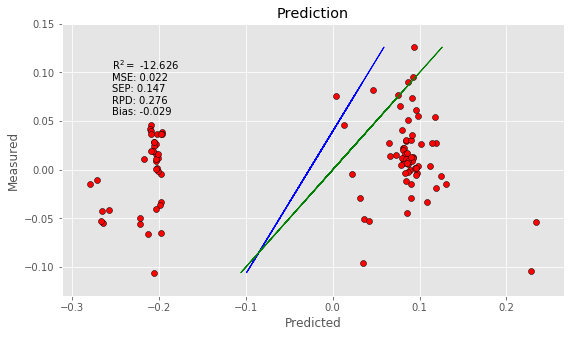

In [145]:
prediction(X_calib, Y_calib, X_valid, Y_valid, plot_components=False)

[ 46.53  66.51  77.99  83.61  88.11  91.08  93.68  95.49  97.    98.07
  98.62  99.11  99.45  99.59  99.72  99.82  99.91  99.95  99.98  99.99
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.  ]
0.32520066747523113
-0.20591184493897985
0.001979211487669805
0.0444883297918657


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


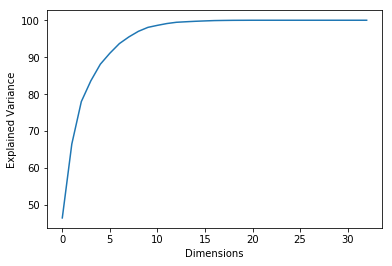

In [146]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

#convert it to numpy arrays
X=train_features
X_test=test_features

#Scaling the values
X = scale(X)
X_test=scale(X_test)

pca = PCA(n_components=33)

pca.fit(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_



#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)

plt.plot(var1)
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')

#Looking at above plot I'm taking 30 variables
pca = PCA(n_components=30)
pca.fit(X)
X1=pca.fit_transform(X)
X1_test=pca.fit_transform(X_test)

from sklearn import linear_model
regr = linear_model.LinearRegression() 

y = train_targets
regr.fit(X1,y)
pred=regr.predict(X1)
y_pred=regr.predict(X1_test)


train_score = r2_score(train_targets, pred)
score = r2_score(test_targets, y_pred)
mse = mean_squared_error(test_targets, y_pred)

print(train_score)
print(score)
print(mse)
print(np.sqrt(mse))

### Decision Tree

In [99]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(train_features, train_targets))
print(decision_tree.score(test_features, test_targets))

0.9999966263958591
-2.9331885802700475


In [100]:
#Scaled Data
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(scaled_train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(scaled_train_features, train_targets))
print(decision_tree.score(scaled_test_features, test_targets))

0.9999966263958591
-2.5990536161340225


In [101]:
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d,random_state=42)
    decision_tree.fit(train_features,train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(train_features, train_targets))
    print(decision_tree.score(test_features, test_targets), '\n')

max_depth= 3
0.4025780129485155
-2.2191598002440753 

max_depth= 5
0.5263992202586352
-4.580414320254727 

max_depth= 10
0.8861232264063905
-5.877729291634706 



In [102]:
#Scaled Data
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d,random_state=42)
    decision_tree.fit(train_features,train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(scaled_train_features, train_targets))
    print(decision_tree.score(scaled_test_features, test_targets), '\n')

max_depth= 3
-0.5259377097058251
-2.702918512626662 

max_depth= 5
-1.0842838722567913
-3.876663395617403 

max_depth= 10
-1.37755551092242
-3.968024974761446 



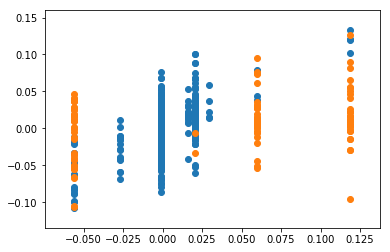

In [103]:
# Use the best max_depth of 3 from last exercise to fit a decision tree
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(train_features, train_targets)

# Predict values for train and test
train_predictions = decision_tree.predict(train_features)
test_predictions = decision_tree.predict(test_features)

# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

### Random Forest

In [130]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.9353665190732383
-0.25220125460285137


Usually, we can use sklearn's GridSearchCV() method to search hyperparameters, but with a financial time series, we don't want to do cross-validation due to data mixing. We want to fit our models on the oldest data and evaluate on the newest data. So we'll use sklearn's ParameterGrid to create combinations of hyperparameters to search.

In [131]:
from sklearn.model_selection import ParameterGrid

# Create a dictionary of hyperparameters to search
grid = {'n_estimators':[200], 'max_depth': [3], 'max_features': [4,8], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_features, train_targets)
    test_scores.append(rfr.score(test_features, test_targets))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

0.01297005327367573 {'random_state': 42, 'n_estimators': 200, 'max_features': 4, 'max_depth': 3}


In [132]:
rfr = RandomForestRegressor(n_estimators=200,max_features=4,max_depth=3,random_state=42)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.35692085563346676
0.01297005327367573


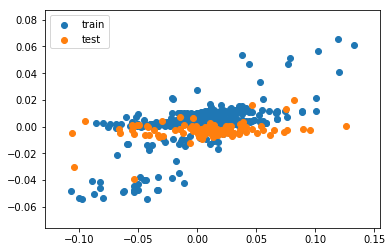

In [133]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rfr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_targets, train_predictions, label='train')
plt.scatter(test_targets, test_predictions, label='test')
plt.legend()
plt.show()

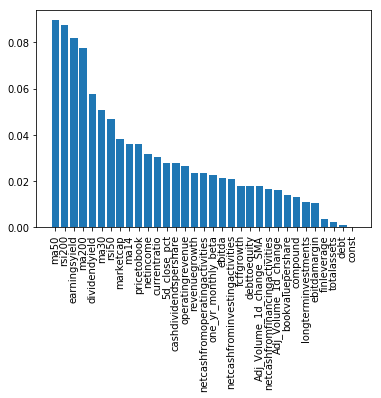

In [134]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))
#x = range(features.shape)
# Create tick labels 
#labels = np.array(feature_names)[sorted_index]
labels = [linear_features.columns[i] for i in sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical

plt.xticks(rotation=90)
plt.show()

In [135]:
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model -- hyperparameters have already been searched for you
gbr = GradientBoostingRegressor(max_features=3,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
gbr.fit(train_features,train_targets)

print(gbr.score(train_features, train_targets))
print(gbr.score(test_features,test_targets))

0.4341765141707675
0.0502625992848299


In [136]:
# Sort feature importances in descending order
#indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
#names = [iris.feature_names[i] for i in indices]

# Create plot
#plt.figure()

# Create plot title
#plt.title("Feature Importance")

# Add bars
#plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
#plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
#plt.show()

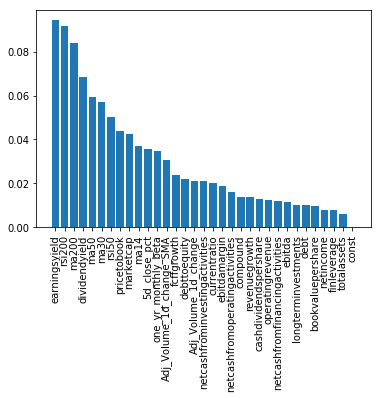

In [137]:
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x = range(len(feature_importances))

# Create tick labels 
#labels = np.array(feature_names)[sorted_index]
labels = [linear_features.columns[i] for i in sorted_index]
plt.bar(x, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

### K Nearest Neighbour

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


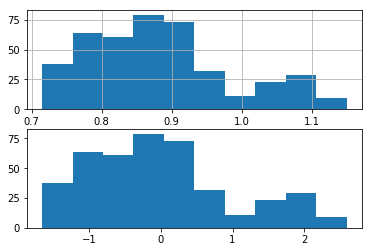

In [112]:


# Standardize the train and test features
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)

# Plot histograms of the 14-day SMA RSI before and after scaling
f, ax = plt.subplots(nrows=2, ncols=1)
train_features.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(scaled_train_features[:, 2])
plt.show()

In [113]:
from sklearn.neighbors import KNeighborsRegressor

for n in range(2, 20):
    # Create and fit the KNN model
    knn = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    knn.fit(scaled_train_features, train_targets)
    
    # Print number of neighbors and the score to find the best value of n
    print("n_neighbors =", n)
    print('train, test scores')
    print(knn.score(scaled_train_features, train_targets))
    print(knn.score(scaled_test_features, test_targets))
    print()  # prints a blank line

n_neighbors = 2
train, test scores
0.8006657503259631
-0.2830511304377854

n_neighbors = 3
train, test scores
0.6956578702923386
-0.2273116642248181

n_neighbors = 4
train, test scores
0.6613185083511532
-0.1380579034424152

n_neighbors = 5
train, test scores
0.6393313483822087
-0.16816920242126399

n_neighbors = 6
train, test scores
0.5984526993077921
-0.23737688000754664

n_neighbors = 7
train, test scores
0.5583774558065663
-0.20261160625223873

n_neighbors = 8
train, test scores
0.5128418757158775
-0.18185143185557084

n_neighbors = 9
train, test scores
0.48666536688840045
-0.16267004104511895

n_neighbors = 10
train, test scores
0.46075705909084297
-0.15471244931915273

n_neighbors = 11
train, test scores
0.428744183649549
-0.12166926462438175

n_neighbors = 12
train, test scores
0.39867068864180544
-0.12316760345903277

n_neighbors = 13
train, test scores
0.38623119633554237
-0.13926814626431638

n_neighbors = 14
train, test scores
0.36623012607194017
-0.14977693327998498

n_neig

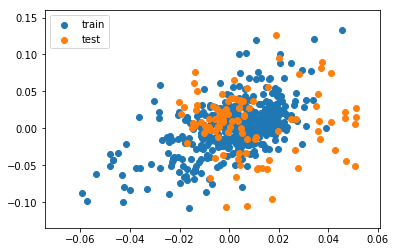

In [114]:
# Create the model with the best-performing n_neighbors of 5
knn = KNeighborsRegressor(n_neighbors=17)

# Fit the model
knn.fit(scaled_train_features, train_targets)

# Get predictions for train and test sets
train_predictions = knn.predict(scaled_train_features)
test_predictions = knn.predict(scaled_test_features)

# Plot the actual vs predicted values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

### Neural Network 

In [115]:
from keras.models import Sequential
from keras.layers import Dense

# Create the model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

# Fit the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/25
419/419 [==============================] - 0s 360us/step - loss: 0.0575
Epoch 2/25
419/419 [==============================] - 0s 27us/step - loss: 0.0108
Epoch 3/25
419/419 [==============================] - 0s 25us/step - loss: 0.0053
Epoch 4/25
419/419 [==============================] - 0s 24us/step - loss: 0.0036
Epoch 5/25
419/419 [==============================] - 0s 36us/step - loss: 0.0029
Epoch 6/25
419/419 [==============================] - 0s 27us/step - loss: 0.0021
Epoch 7/25
419/419 [==============================] - 0s 23us/step - loss: 0.0018
Epoch 8/25
419/419 [==============================] - 0s 30us/step - loss: 0.0014
Epoch 9/25
419/419 [==============================] - 0s 28us/step - loss: 0.0013
Epoch 10/25
419/419 [==============================] - 0s 27us/step - loss: 0.0013
Epoch 11/25
419/419 [==============================] - 0s 29us/step - loss: 0.0013
Epoch 12/25
419/419 [==============================] - 0s 30us/step - loss: 0.0010
Epoch 13/25


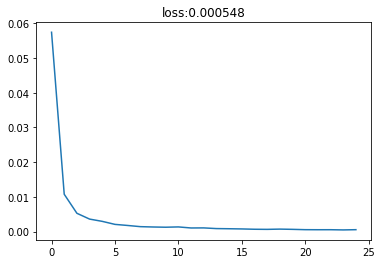

In [116]:
# Plot the losses from the fit
plt.plot(history.history['loss'])

# Use the last loss as the title
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

0.6363936196573464
-5.479048817395991


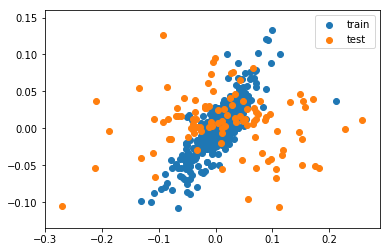

In [117]:
from sklearn.metrics import r2_score

# Calculate R^2 score
train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Plot predictions vs actual
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds,test_targets, label='test')
plt.legend()
plt.show()

In [118]:
import keras.losses
import tensorflow as tf

# Create loss function
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

keras.losses.sign_penalty = sign_penalty  # enable use of loss with keras
print(keras.losses.sign_penalty)

<function sign_penalty at 0x1c2a3e5598>


Epoch 1/25
419/419 [==============================] - 0s 431us/step - loss: 13.1715
Epoch 2/25
419/419 [==============================] - 0s 24us/step - loss: 1.8930
Epoch 3/25
419/419 [==============================] - 0s 24us/step - loss: 0.8641
Epoch 4/25
419/419 [==============================] - 0s 24us/step - loss: 0.5692
Epoch 5/25
419/419 [==============================] - 0s 27us/step - loss: 0.3849
Epoch 6/25
419/419 [==============================] - 0s 36us/step - loss: 0.3001
Epoch 7/25
419/419 [==============================] - 0s 24us/step - loss: 0.2175
Epoch 8/25
419/419 [==============================] - 0s 29us/step - loss: 0.1784
Epoch 9/25
419/419 [==============================] - 0s 32us/step - loss: 0.1332
Epoch 10/25
419/419 [==============================] - 0s 30us/step - loss: 0.1177
Epoch 11/25
419/419 [==============================] - 0s 28us/step - loss: 0.0957
Epoch 12/25
419/419 [==============================] - 0s 33us/step - loss: 0.0810
Epoch 13/25

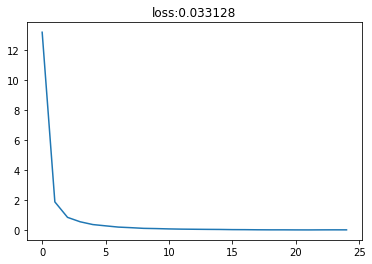

In [119]:
# Create the model
model_2 = Sequential()
model_2.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
model_2.compile(optimizer='adam', loss=sign_penalty)
history = model_2.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

-2.5548580926797952
-163.39022279267363


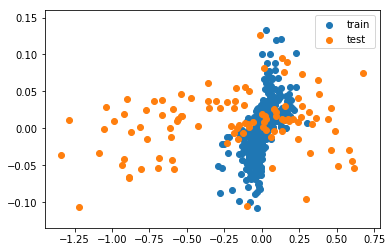

In [120]:
# Evaluate R^2 scores
train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label= 'test')  # plot test set
plt.legend(); plt.show()

Epoch 1/25
419/419 [==============================] - 0s 499us/step - loss: 0.1701
Epoch 2/25
419/419 [==============================] - 0s 26us/step - loss: 0.0691
Epoch 3/25
419/419 [==============================] - 0s 26us/step - loss: 0.0485
Epoch 4/25
419/419 [==============================] - 0s 29us/step - loss: 0.0469
Epoch 5/25
419/419 [==============================] - 0s 44us/step - loss: 0.0355
Epoch 6/25
419/419 [==============================] - 0s 29us/step - loss: 0.0275
Epoch 7/25
419/419 [==============================] - 0s 34us/step - loss: 0.0224
Epoch 8/25
419/419 [==============================] - 0s 28us/step - loss: 0.0254
Epoch 9/25
419/419 [==============================] - 0s 28us/step - loss: 0.0229
Epoch 10/25
419/419 [==============================] - 0s 43us/step - loss: 0.0215
Epoch 11/25
419/419 [==============================] - 0s 31us/step - loss: 0.0182
Epoch 12/25
419/419 [==============================] - 0s 30us/step - loss: 0.0182
Epoch 13/25


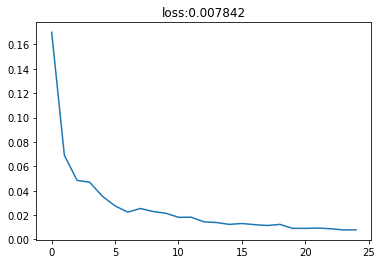

In [121]:
from keras.layers import Dropout

# Create model with dropout
model_3 = Sequential()
model_3.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

# Fit model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

In [122]:
# Make predictions from the 3 neural net models
train_pred1 = model_1.predict(scaled_train_features)
test_pred1 = model_1.predict(scaled_test_features)

train_pred2 = model_2.predict(scaled_train_features)
test_pred2 = model_2.predict(scaled_test_features)

train_pred3 = model_3.predict(scaled_train_features)
test_pred3 = model_3.predict(scaled_test_features)

# Horizontally stack predictions and take the average across rows
train_preds = np.mean(np.hstack((train_pred1, train_pred2, train_pred3)), axis=1)
test_preds = np.mean(np.hstack((test_pred1,test_pred2, test_pred3)), axis=1)
print(test_preds[-5:])

[-0.29271397 -0.18566205 -0.2058904  -0.31211597 -0.23789783]


0.33898738955831864
-30.980528692665487


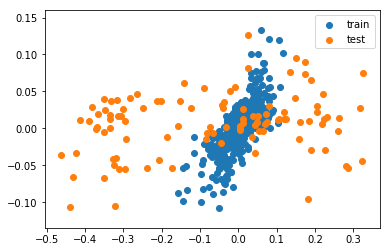

In [123]:
from sklearn.metrics import r2_score

# Evaluate the R^2 scores
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.legend(); plt.show()